In [1]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import torch
from IPython import display

%matplotlib inline

In [2]:
import gym.spaces
import gym
import FastSLAM2
import hw6_ppo

In [3]:
env = gym.make('FastSLAM-v2')
agent = hw6_ppo.PPOAgent(env)

/home/akshay_shetty160992/.local/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [4]:
load_model = 'case5_LM_latest'
PATH = 'saved_models/' + load_model + '.pth'
# PATH = 'saved_models/case5_LM_best_9LMstate.pth'
checkpoint = torch.load(PATH)
agent.net.load_state_dict(checkpoint['model_state_dict'])

best_reward = checkpoint['best_reward']
rewards = checkpoint['rewards']
losses = checkpoint['losses']
losses_clip = checkpoint['losses_clip']
losses_V = checkpoint['losses_V']
losses_entropy = checkpoint['losses_entropy']
stds = checkpoint['stds']
times_sample = checkpoint['times_sample']
times_opt = checkpoint['times_opt']
print('==== model ' + load_model + ' loaded ====')

FileNotFoundError: [Errno 2] No such file or directory: 'saved_models/case5_LM_latest.pth'

Best reward: 0.7343478260869565


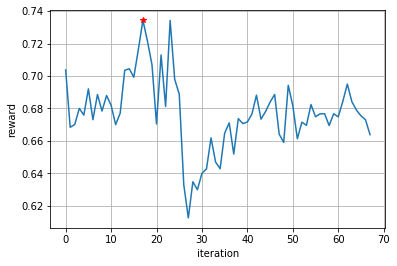

In [5]:
print('Best reward: ' + str(best_reward))
plt.plot(rewards)
plt.plot(np.argmax(rewards), np.max(rewards), 'r*')
plt.xlabel('iteration')
plt.ylabel('reward');
plt.grid()
plt.show()

In [5]:
agent = hw6_ppo.PPOAgent(env)
load_model = 'case5_LM_best'
PATH = 'saved_models/' + load_model + '.pth'
checkpoint = torch.load(PATH)
agent.net.load_state_dict(checkpoint['model_state_dict'])
# agent.net.train()
            
best_reward = checkpoint['best_reward']
rewards = checkpoint['rewards']
losses = checkpoint['losses']
losses_clip = checkpoint['losses_clip']
losses_V = checkpoint['losses_V']
losses_entropy = checkpoint['losses_entropy']
stds = checkpoint['stds']
times_sample = checkpoint['times_sample']
times_opt = checkpoint['times_opt']
print('==== model ' + load_model + ' loaded ====')

==== model case5_LM_best loaded ====


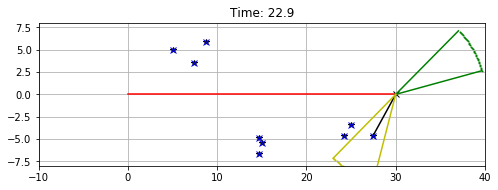

In [6]:
state = env.reset()
a_, r_, mu_, sigma_, _state_ = [], [], [], [], []
horizon = 230
for t in range(1,horizon):
    _state_.append(state)
    action = agent.action_greedy(state)

    state_, reward, done, _ = env.step(action)

    a_.append(action)
    r_.append(reward)
    state = state_
    
    env.render_world()
#     env.render_obs_fixedLM()
    display.clear_output(wait=True)
    plt.pause(0.001)

average reward per step = 0.8165938864628821


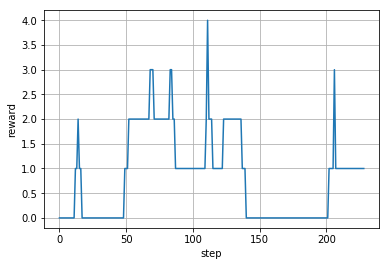

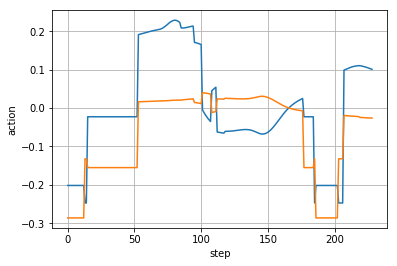

In [7]:
print(f'average reward per step = {sum(r_) / float(len(r_))}')

plt.plot(r_)
plt.xlabel('step')
plt.ylabel('reward')
plt.grid()
plt.show()

plt.plot(a_)
plt.xlabel('step')
plt.ylabel('action')
plt.grid()
plt.show()